In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt 
import math

from RBM import RBM
from Mnist_RBM import Mnist
from RBM import RBM

In [44]:
def train(mnist,rbm,noise=False,batch_size=4,epochs=350,batch_num=10):
    errors=[]
    err_epoch=[]
    seed=np.random.RandomState(20240701)
    for i in range(epochs):
        for j in range(batch_num):
            data=mnist.train_image['imgs'][j*batch_size:(j+1)*batch_size]
            train_data=np.reshape(data,(-1,28*28))
            train_data=(train_data>=30).astype(np.float32)
            error,_,_=rbm.C_D(train_data)
            errors.append(error)

        err_epoch.append(sum(errors)/len(errors))
    
    return errors,err_epoch

In [45]:
def test_generate(mnist,rbm,num,noise=False):
    seed=np.random.RandomState(20240701)
    test_data=mnist.test_image['imgs']
    Original_image=test_data[num]
    Image.fromarray(Original_image).save(f'original_test_{num}.png')
    if noise:
        image_noised=Original_image-seed.random(Original_image.shape)*255
        Image.fromarray(image_noised).save(f'noised_test_{num}.png')
        reconstruct_image=rbm.sample_visible(rbm.sample_hidden((image_noised>=30).reshape(-1,28*28)))*255
        Image.fromarray(reconstruct_image.reshape((28,28))).save(f'Noised_test_generated_{num}.png')
    else:
        reconstruct_image=rbm.sample_visible(rbm.sample_hidden((Original_image>=30).reshape(-1,28*28)))*255
        Image.fromarray(reconstruct_image.reshape((28,28)).astype(np.uint8)).save(f'Generated_test_{num}.png')

In [77]:
mnist=Mnist()
rbm=RBM(28*28,28*28,10,1e-3)
errors,err_epochs=train(mnist,rbm,epochs=600,batch_num=20)
test_generate(mnist,rbm,110)

In [78]:
test_data=mnist.test_image['imgs']
Original_image=test_data[110]
Image.fromarray(Original_image).show()

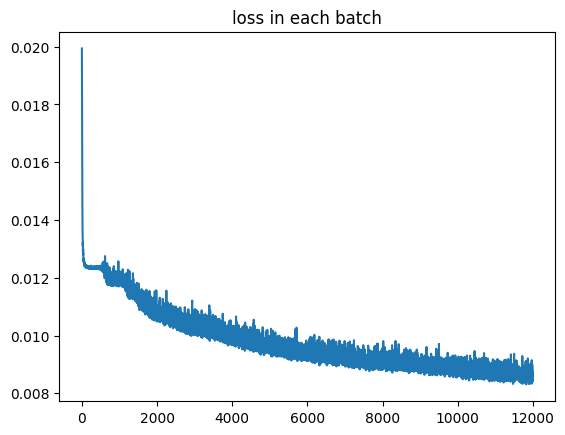

In [79]:
epochs=600
batch_num=20
x1=[i for i in range(epochs*batch_num)]
x2=[i for i in range(epochs)]
final_errors=[math.sqrt(x)/16/784 for x in errors]
plt.title("loss in each batch")
plt.plot(x1,final_errors)

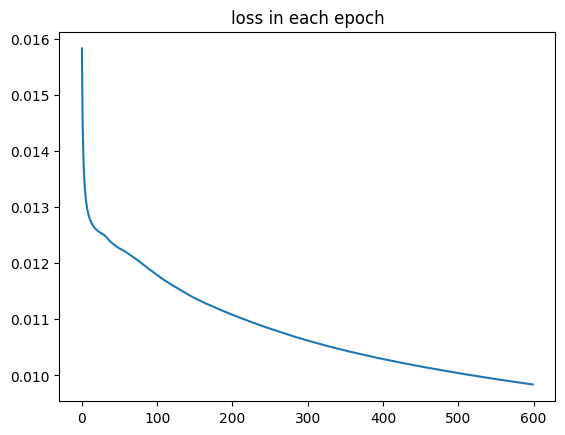

In [80]:
final_err_epochs=[math.sqrt(x)/16/784 for x in err_epochs]
plt.title("loss in each epoch")
plt.plot(x2,final_err_epochs)